
Question type distribution:

question_type
Other                    2391
Code Understanding       1142
Task                      963
Function/Syntax Usage     417
Error                     397
Reasoning                 177
Logical Error              44
Algorithm                  12
Name: count, dtype: int64


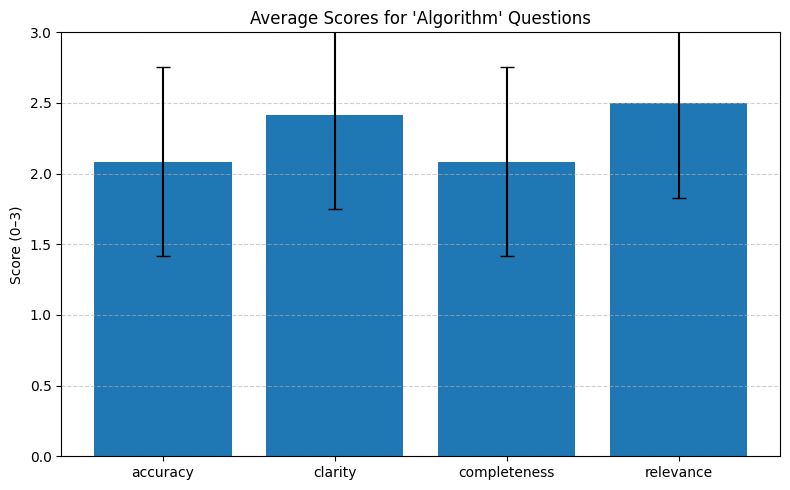

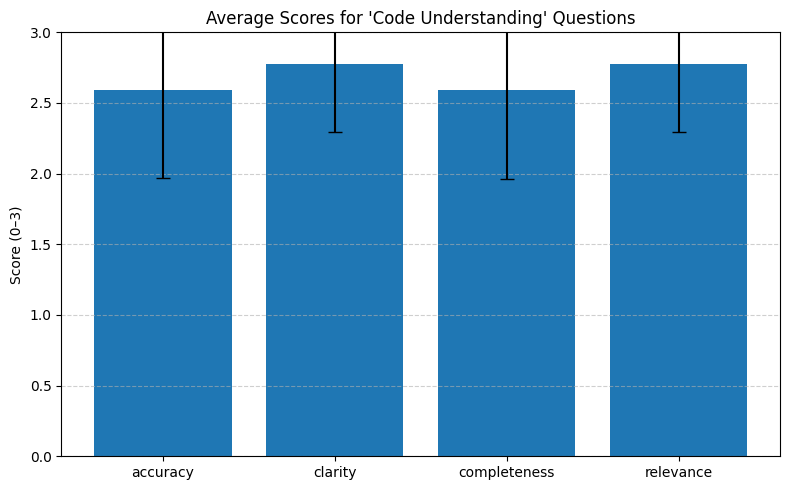

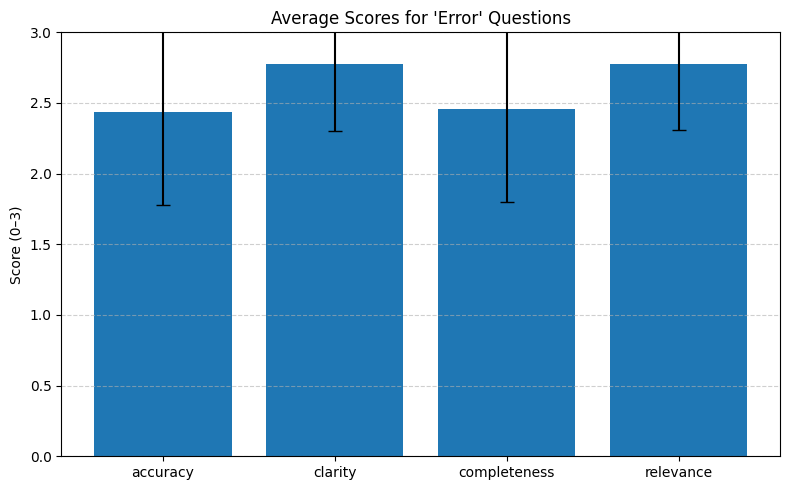

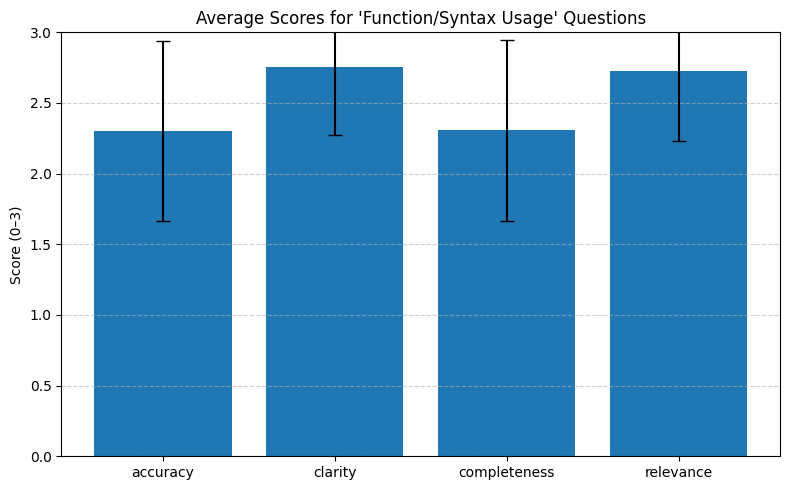

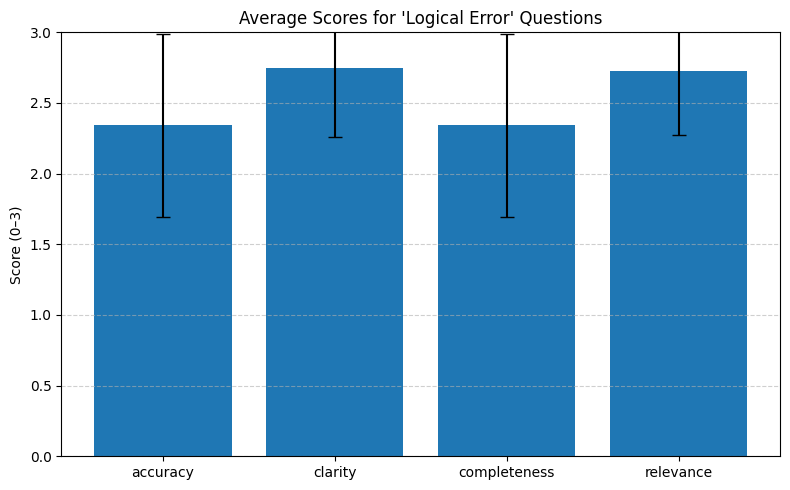

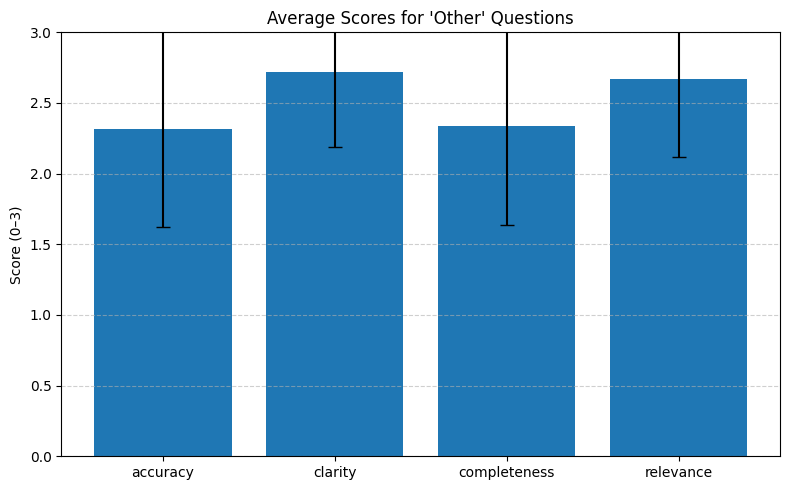

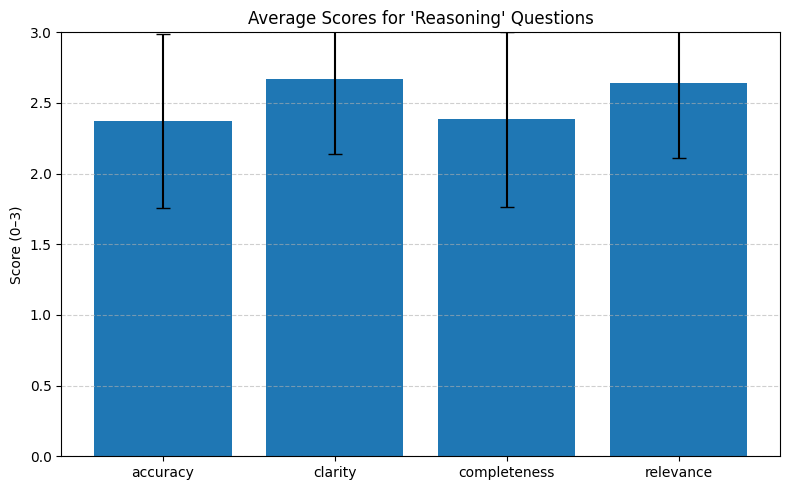

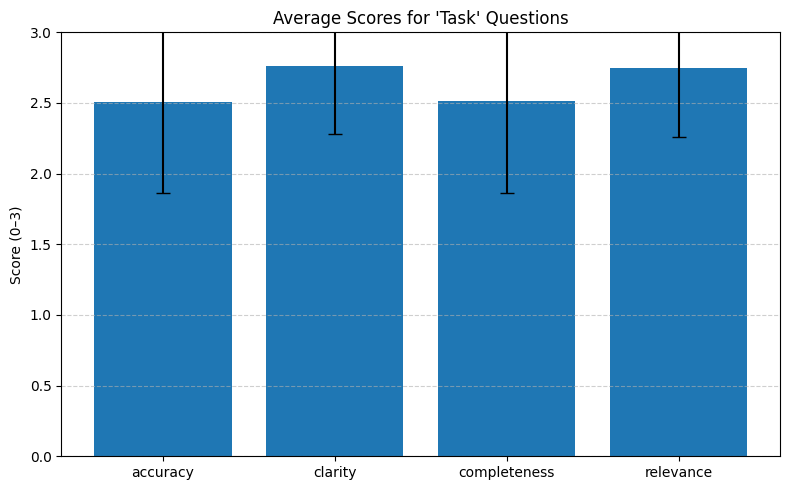


Summary table:

           Question Type     Accuracy Completeness      Clarity    Relevance
0              Algorithm  2.08 (0.67)  2.08 (0.67)  2.42 (0.67)  2.50 (0.67)
1     Code Understanding  2.59 (0.62)  2.59 (0.63)  2.78 (0.48)  2.78 (0.48)
2                  Error  2.43 (0.66)  2.46 (0.66)  2.78 (0.47)  2.78 (0.47)
3  Function/Syntax Usage  2.30 (0.64)  2.31 (0.64)  2.76 (0.48)  2.73 (0.50)
4          Logical Error  2.34 (0.64)  2.34 (0.64)  2.75 (0.49)  2.73 (0.45)
5                  Other  2.32 (0.69)  2.34 (0.70)  2.72 (0.53)  2.67 (0.55)
6              Reasoning  2.37 (0.62)  2.38 (0.62)  2.67 (0.53)  2.64 (0.54)
7                   Task  2.51 (0.64)  2.51 (0.65)  2.76 (0.48)  2.75 (0.49)


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# ==============================
# Step 1: Load the dataset
# ==============================
df = pd.read_csv("CS1QA_mistral_student_evaluations.csv")

metrics = ["accuracy", "clarity", "completeness", "relevance"]

# ==============================
# Step 2: Automatic question-type classification
# ==============================
def classify_question_type_text(q):
    q = str(q).lower()

    if re.search(r"\b(typeerror|nameerror|indexerror|keyerror|valueerror|syntaxerror|traceback|exception|error)\b", q):
        return "Error"
    if re.search(r"\b(explain|what does this code do|meaning of|why does|what is happening)\b", q):
        return "Code Understanding"
    if re.search(r"\b(algorithm|approach|complexity|big[- ]o|optimi[sz]e)\b", q):
        return "Algorithm"
    if re.search(r"\b(how do i|how to|syntax|parameter|argument|import|call this function|use .* function)\b", q):
        return "Function/Syntax Usage"
    if re.search(r"\b(wrong output|bug|doesn't work|doesnt work|unexpected|logic|logical|correct but)\b", q):
        return "Logical Error"
    if re.search(r"\b(reason|because|prove|justify)\b", q):
        return "Reasoning"
    if re.search(r"\b(task\d+|assignment|problem|task )\b", q):
        return "Task"

    return "Other"

df["question_type"] = df["question"].apply(classify_question_type_text)

print("\nQuestion type distribution:\n")
print(df["question_type"].value_counts())

# ==============================
# Step 3: Visualization function
# ==============================
def visualize_scores(subset, title):
    stats = subset[metrics].agg(["mean", "std"]).T.fillna(0)

    plt.figure(figsize=(8, 5))
    plt.bar(stats.index, stats["mean"], yerr=stats["std"], capsize=5)
    plt.title(title)
    plt.ylabel("Score (0–3)")
    plt.ylim(0, 3)
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

# ==============================
# Step 4: Generate plots
# ==============================
for qtype, subset in df.groupby("question_type"):
    if subset[metrics].notna().any().any():
        visualize_scores(subset, f"Average Scores for '{qtype}' Questions")

# ==============================
# Step 5: Summary table
# ==============================
summary_rows = []

for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype}
    for m in metrics:
        row[(m, "mean")] = subset[m].mean()
        row[(m, "std")] = subset[m].std()
    summary_rows.append(row)

summary = pd.DataFrame(summary_rows)

pretty = {"Question Type": summary["Question Type"]}
for m in metrics:
    mean = summary[(m, "mean")]
    std = summary[(m, "std")].fillna(0)
    pretty[m.capitalize()] = mean.map(lambda x: f"{x:.2f}" if pd.notna(x) else "N/A") + \
                              " (" + std.map(lambda x: f"{x:.2f}") + ")"

summary_df = pd.DataFrame(pretty)[
    ["Question Type", "Accuracy", "Completeness", "Clarity", "Relevance"]
]

print("\nSummary table:\n")
print(summary_df)


In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the dataset ===
with open("CS1QA_mistral_student_evaluations.csv", "r") as f:
    data = json.load(f)

df = pd.DataFrame(data)

# === Step 2: Classify question types ===
def classify_question_type(q):
    if q.startswith("code_understanding"):
        return "Code Understanding"
    elif q.startswith("logical"):
        return "Logical Error"
    elif q.startswith("error"):
        return "Error"
    elif q.startswith("usage"):
        return "Function/Syntax Usage"
    elif q.startswith("algorithm"):
        return "Algorithm"
    elif q.startswith("task"):
        return "Task"
    elif q.startswith("reasoning"):
        return "Reasoning"
    elif q.startswith("code_explain"):
        return "Explanation"
    elif q.startswith("variable"):
        return "Meaning"
    else:
        return "Other"

df['question_type'] = df['questionType'].apply(classify_question_type)

# === Step 3: Extract score values from nested structure ===
metrics = ["accuracy", "clarity", "completeness", "relevance"]
for metric in metrics:
    df[metric] = df[metric].apply(lambda x: x.get("score") if isinstance(x, dict) else None)

# === Step 4: Generate plots for each question type ===
def visualize_scores(flat_records, title):
    df_scores = pd.DataFrame(flat_records)
    grouped = df_scores.groupby("metric")["score"]
    avg_scores = grouped.mean()
    std_scores = grouped.std().fillna(0)

    plt.figure(figsize=(8, 5))
    plt.bar(
        avg_scores.index,
        avg_scores.values,
        yerr=std_scores.values,
        capsize=5,
        color='skyblue',
        edgecolor='black'
    )
    plt.title(title)
    plt.ylabel("Score (0–3)")
    plt.ylim(0, 3)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

for qtype, subset in df.groupby("question_type"):
    flat_records = []
    for metric in metrics:
        for score in subset[metric].dropna():
            flat_records.append({"metric": metric, "score": score})
    if flat_records:
        visualize_scores(flat_records, title=f"Average Scores for '{qtype}' Questions")

# === Step 5: Create a summary table ===
summary = []
for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype}
    for metric in metrics:
        mean_val = subset[metric].mean()
        std_val = subset[metric].std()
        if pd.notna(mean_val) and pd.notna(std_val):
            row[metric.capitalize()] = f"{mean_val:.2f} ({std_val:.2f})"
        elif pd.notna(mean_val):
            row[metric.capitalize()] = f"{mean_val:.2f} (0.00)"
        else:
            row[metric.capitalize()] = "N/A"
    summary.append(row)

summary_df = pd.DataFrame(summary)
summary_df = summary_df[["Question Type", "Accuracy", "Completeness", "Clarity", "Relevance"]]
summary_df = summary_df.round(2)

# === Display the table ===
from IPython.display import display
display(summary_df)


UnicodeDecodeError: 'charmap' codec can't decode byte 0x9d in position 3236: character maps to <undefined>

Not a JSON file, trying CSV formats...
✓ Loaded as CSV with separator: ','
Dataset: 5543 rows × 9 columns
Columns: ['id', 'code', 'question', 'answer', 'prediction', 'accuracy', 'completeness', 'relevance', 'clarity']

Using 'question' column content for classification

Question type distribution:
question_type
Other     3595
Yes/No     653
What       526
How        283
Why        178
When       166
Task       122
Where       20

✓ Processed 'accuracy': 5541 valid scores
✓ Processed 'clarity': 5541 valid scores
✓ Processed 'completeness': 5541 valid scores
✓ Processed 'relevance': 5541 valid scores

Generating visualizations...



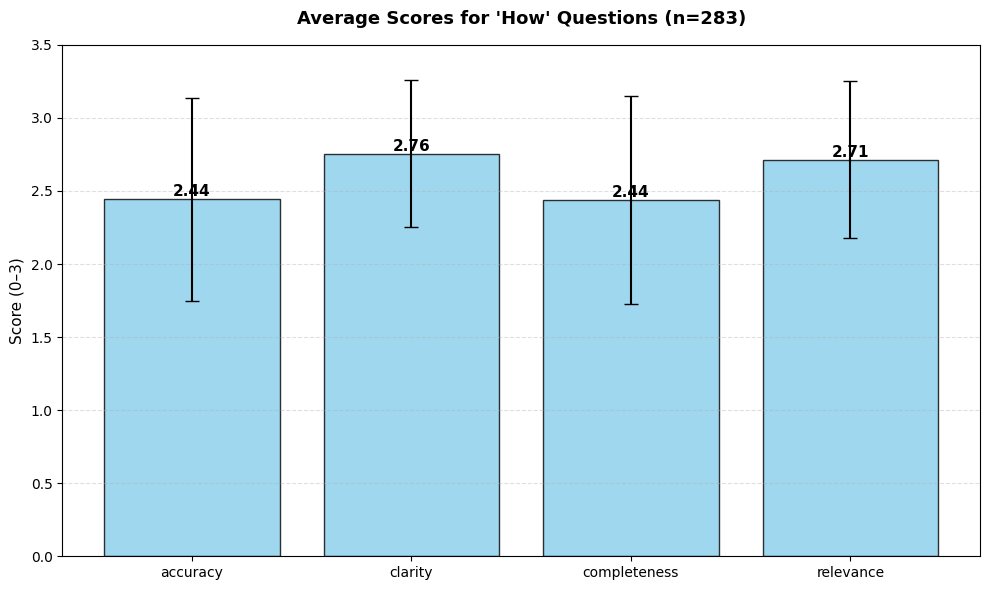

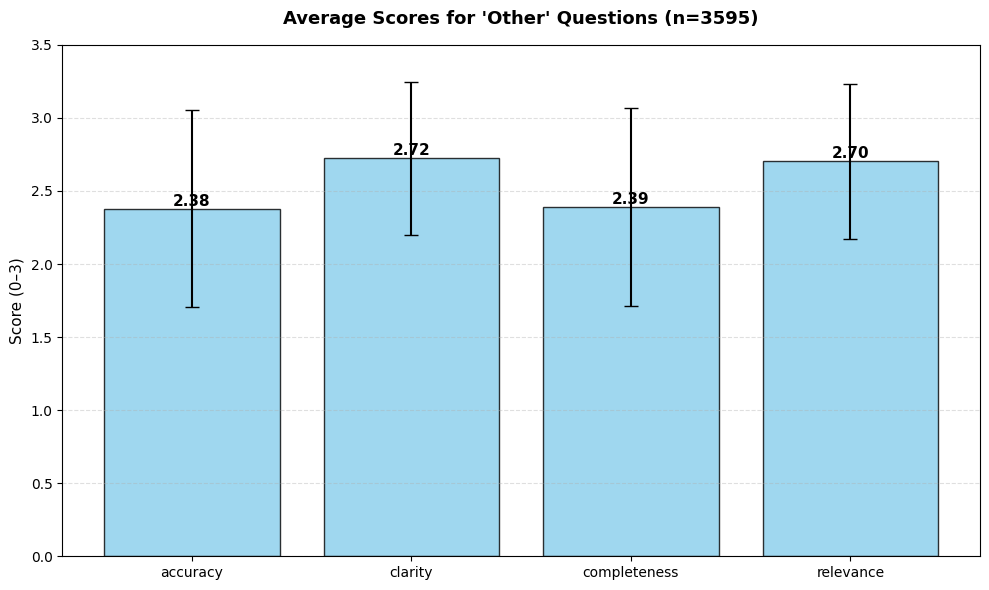

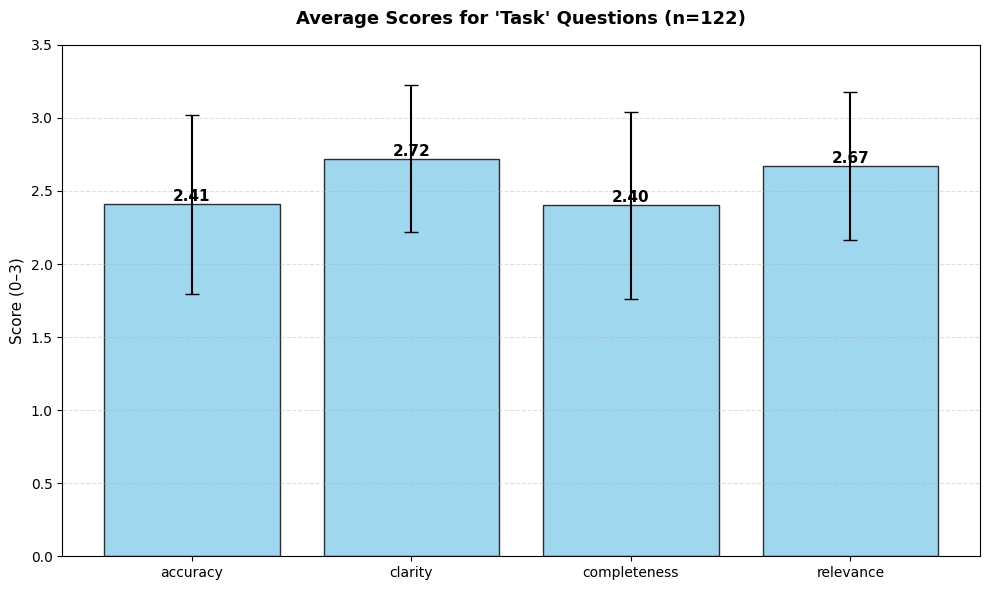

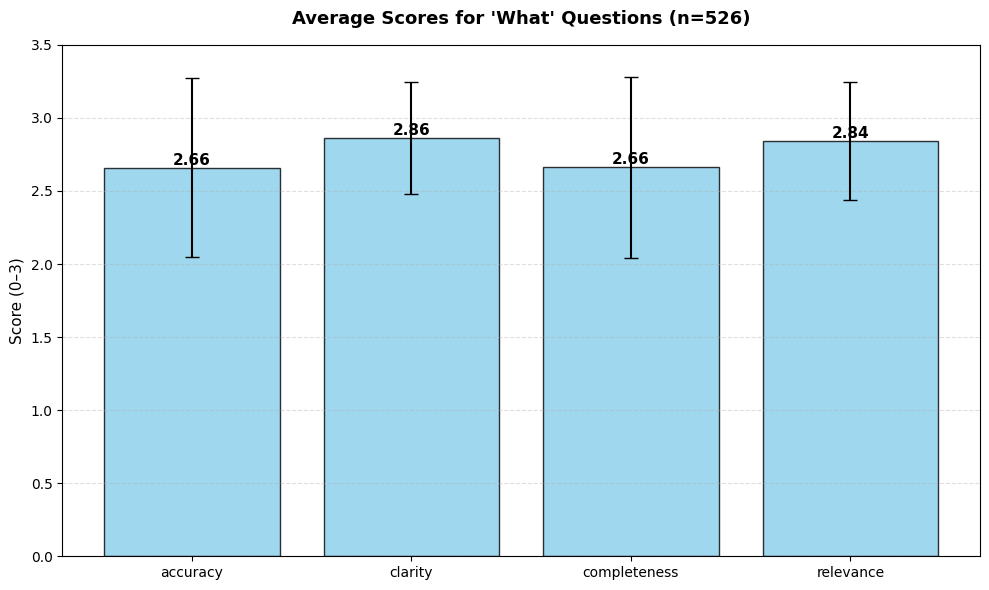

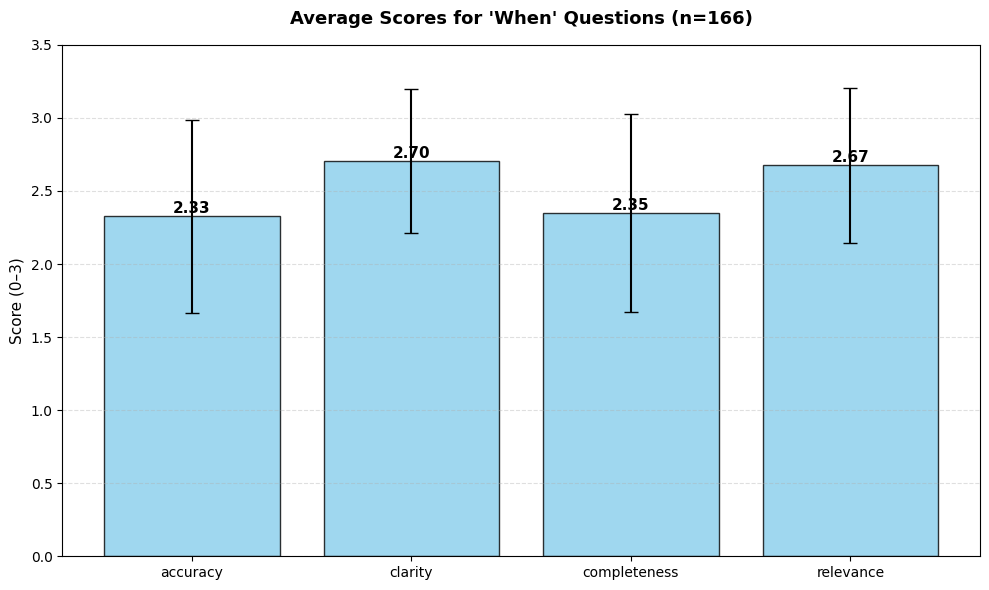

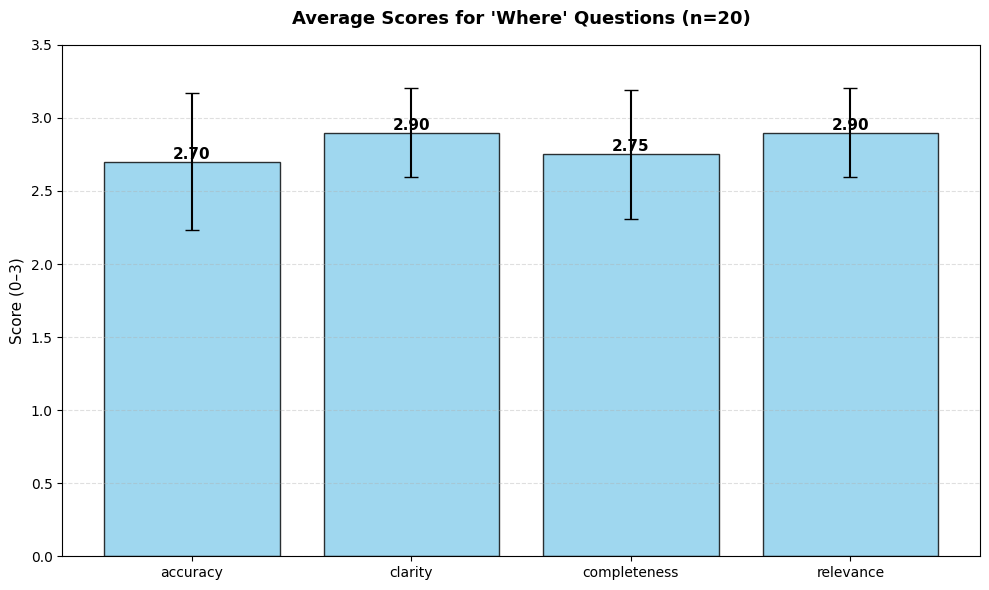

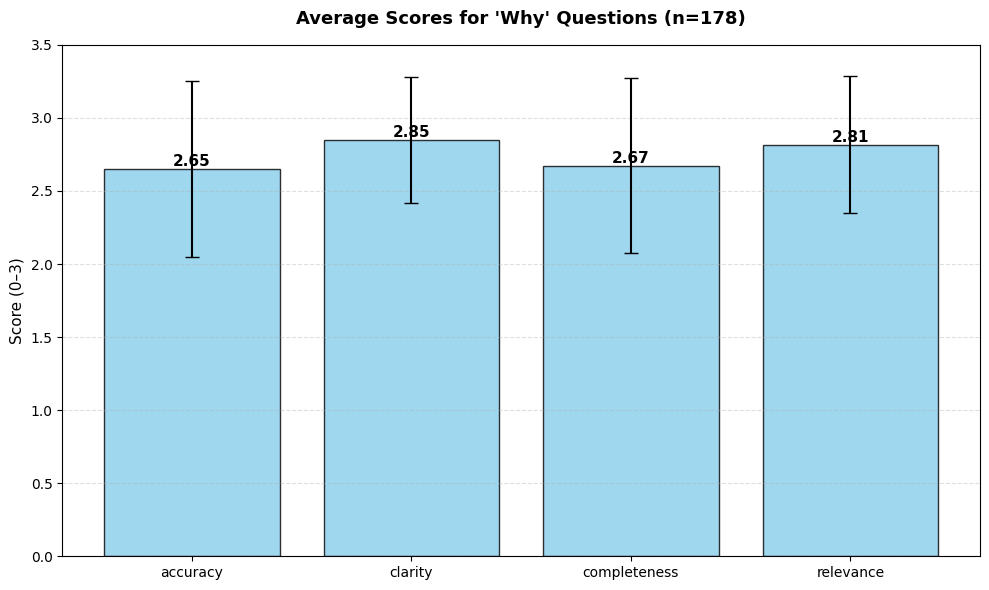

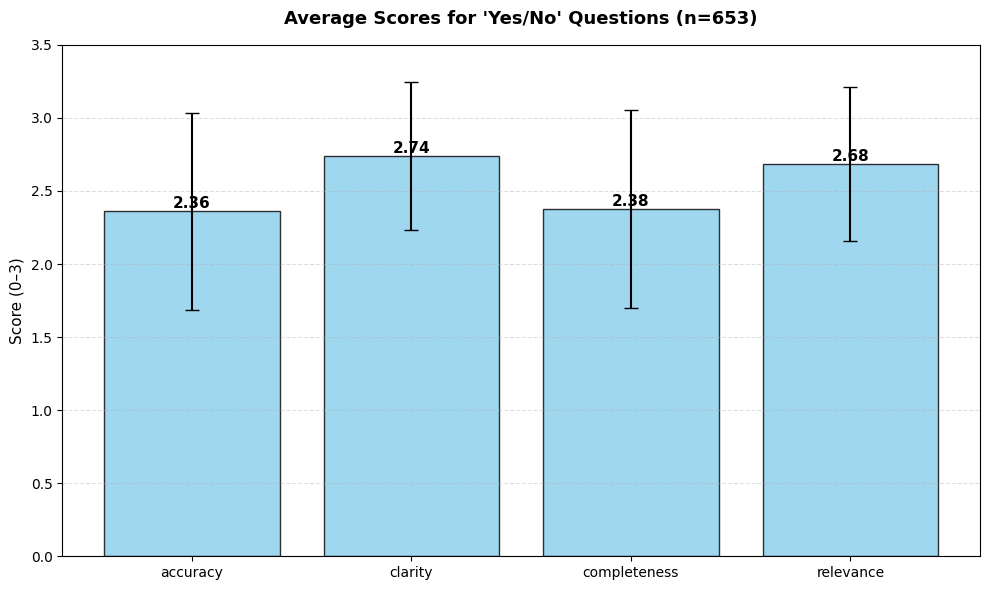


SUMMARY STATISTICS BY QUESTION TYPE
Question Type  Count     Accuracy Completeness      Clarity    Relevance
        Other   3595 2.38 (±0.67) 2.39 (±0.68) 2.72 (±0.52) 2.70 (±0.53)
       Yes/No    653 2.36 (±0.67) 2.38 (±0.68) 2.74 (±0.50) 2.68 (±0.53)
         What    526 2.66 (±0.61) 2.66 (±0.62) 2.86 (±0.38) 2.84 (±0.40)
          How    283 2.44 (±0.69) 2.44 (±0.71) 2.76 (±0.51) 2.71 (±0.54)
          Why    178 2.65 (±0.60) 2.67 (±0.60) 2.85 (±0.43) 2.81 (±0.47)
         When    166 2.33 (±0.66) 2.35 (±0.68) 2.70 (±0.50) 2.67 (±0.53)
         Task    122 2.41 (±0.61) 2.40 (±0.64) 2.72 (±0.50) 2.67 (±0.51)
        Where     20 2.70 (±0.47) 2.75 (±0.44) 2.90 (±0.31) 2.90 (±0.31)

OVERALL STATISTICS:
-----------------------------------------------------------------------------------------------
Accuracy       : Mean=2.42 (±0.67), Median=3.00, Range=[1, 3]
Clarity        : Mean=2.74 (±0.51), Median=3.00, Range=[1, 3]
Completeness   : Mean=2.43 (±0.68), Median=3.00, Range=[1, 3]
Rel

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# === Step 1: Load the dataset (Auto-detect JSON vs CSV) ===
filename = "CS1QA_mistral_student_evaluations.csv"

# Try to load as JSON first
try:
    with open(filename, "r") as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    print(f"✓ Loaded as JSON: {len(df)} records")
    is_json = True
except (json.JSONDecodeError, ValueError):
    # If JSON fails, try CSV with different separators
    print("Not a JSON file, trying CSV formats...")
    is_json = False
    
    separators = ['\t', ',', ';', '|']
    for sep in separators:
        try:
            df = pd.read_csv(filename, sep=sep, encoding='utf-8')
            if len(df.columns) > 1:  # Successfully parsed into multiple columns
                print(f"✓ Loaded as CSV with separator: {repr(sep)}")
                break
        except:
            continue
    else:
        # Auto-detect as last resort
        df = pd.read_csv(filename, sep=None, engine='python', encoding='utf-8')
        print("✓ Loaded with auto-detected separator")

print(f"Dataset: {len(df)} rows × {len(df.columns)} columns")
print(f"Columns: {df.columns.tolist()}\n")

# === Step 2: Classify question types ===
def classify_question_type(q):
    q_str = str(q).lower()
    
    if q_str.startswith("code_understanding"):
        return "Code Understanding"
    elif q_str.startswith("logical"):
        return "Logical Error"
    elif q_str.startswith("error"):
        return "Error"
    elif q_str.startswith("usage"):
        return "Function/Syntax Usage"
    elif q_str.startswith("algorithm"):
        return "Algorithm"
    elif q_str.startswith("task"):
        return "Task"
    elif q_str.startswith("reasoning"):
        return "Reasoning"
    elif q_str.startswith("code_explain"):
        return "Explanation"
    elif q_str.startswith("variable"):
        return "Meaning"
    # If none match, classify by question wording for CSV format
    elif q_str.startswith("what"):
        return "What"
    elif q_str.startswith("how"):
        return "How"
    elif q_str.startswith("where"):
        return "Where"
    elif q_str.startswith("when"):
        return "When"
    elif q_str.startswith("why"):
        return "Why"
    elif q_str.startswith(("does", "do", "is", "are", "can", "for what", "in which")):
        return "Yes/No"
    else:
        return "Other"

# Find the appropriate column for question types
if 'questionType' in df.columns:
    df['question_type'] = df['questionType'].apply(classify_question_type)
    print("Using 'questionType' column for classification")
elif 'question_type' in df.columns:
    temp_type = df['question_type'].copy()
    df['question_type'] = temp_type.apply(classify_question_type)
    print("Using 'question_type' column for classification")
elif 'question' in df.columns:
    df['question_type'] = df['question'].apply(classify_question_type)
    print("Using 'question' column content for classification")
else:
    print("⚠ No suitable column found for question type classification")
    df['question_type'] = "Other"

print("\nQuestion type distribution:")
print(df['question_type'].value_counts().to_string())
print()

# === Step 3: Extract score values from nested structure (or use direct values) ===
metrics = ["accuracy", "clarity", "completeness", "relevance"]

# Handle 'completen' if it exists (truncated column name)
if 'completen' in df.columns and 'completeness' not in df.columns:
    df['completeness'] = df['completen']
    print("Note: Renamed 'completen' to 'completeness'")

for metric in metrics:
    if metric in df.columns:
        # For JSON: extract 'score' from dict; For CSV: convert to numeric
        df[metric] = df[metric].apply(
            lambda x: x.get("score") if isinstance(x, dict) else (float(x) if pd.notna(x) else None)
        )
        valid_count = df[metric].notna().sum()
        print(f"✓ Processed '{metric}': {valid_count} valid scores")
    else:
        print(f"⚠ '{metric}' column not found")

print()

# === Step 4: Generate plots for each question type ===
def visualize_scores(flat_records, title):
    if not flat_records:
        return
    
    df_scores = pd.DataFrame(flat_records)
    grouped = df_scores.groupby("metric")["score"]
    avg_scores = grouped.mean()
    std_scores = grouped.std().fillna(0)

    plt.figure(figsize=(10, 6))
    bars = plt.bar(
        avg_scores.index,
        avg_scores.values,
        yerr=std_scores.values,
        capsize=5,
        color='skyblue',
        edgecolor='black',
        alpha=0.8
    )
    
    # Add value labels
    for bar, val in zip(bars, avg_scores.values):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{val:.2f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.title(title, fontsize=13, fontweight='bold', pad=15)
    plt.ylabel("Score (0–3)", fontsize=11)
    plt.ylim(0, 3.5)
    plt.grid(axis='y', linestyle='--', alpha=0.4)
    plt.tight_layout()
    plt.show()

print("Generating visualizations...\n")
for qtype, subset in df.groupby("question_type"):
    flat_records = []
    for metric in metrics:
        if metric in df.columns:
            for score in subset[metric].dropna():
                if pd.notna(score):
                    flat_records.append({"metric": metric, "score": score})
    
    if flat_records:
        visualize_scores(flat_records, title=f"Average Scores for '{qtype}' Questions (n={len(subset)})")
    else:
        print(f"⚠ No valid scores for '{qtype}'")

# === Step 5: Create a summary table ===
summary = []
for qtype, subset in df.groupby("question_type"):
    row = {"Question Type": qtype, "Count": len(subset)}
    
    for metric in metrics:
        if metric in df.columns:
            mean_val = subset[metric].mean()
            std_val = subset[metric].std()
            if pd.notna(mean_val):
                if pd.notna(std_val):
                    row[metric.capitalize()] = f"{mean_val:.2f} (±{std_val:.2f})"
                else:
                    row[metric.capitalize()] = f"{mean_val:.2f} (±0.00)"
            else:
                row[metric.capitalize()] = "N/A"
        else:
            row[metric.capitalize()] = "N/A"
    
    summary.append(row)

summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values('Count', ascending=False)

# Reorder columns
column_order = ["Question Type", "Count", "Accuracy", "Completeness", "Clarity", "Relevance"]
available_columns = [col for col in column_order if col in summary_df.columns]
summary_df = summary_df[available_columns]

# === Display the table ===
print("\n" + "="*95)
print("SUMMARY STATISTICS BY QUESTION TYPE")
print("="*95)
print(summary_df.to_string(index=False))
print("="*95)

# Overall statistics
print("\nOVERALL STATISTICS:")
print("-" * 95)
for metric in metrics:
    if metric in df.columns:
        mean_val = df[metric].mean()
        std_val = df[metric].std()
        median_val = df[metric].median()
        min_val = df[metric].min()
        max_val = df[metric].max()
        print(f"{metric.capitalize():15s}: Mean={mean_val:.2f} (±{std_val:.2f}), "
              f"Median={median_val:.2f}, Range=[{min_val:.0f}, {max_val:.0f}]")
print("-" * 95)

# Save results
output_prefix = filename.replace('.csv', '').replace('.json', '')
summary_df.to_csv(f"{output_prefix}_summary.csv", index=False)
print(f"\n✓ Summary saved to '{output_prefix}_summary.csv'")

df.to_csv(f"{output_prefix}_detailed.csv", index=False)
print(f"✓ Detailed data saved to '{output_prefix}_detailed.csv'")